In [7]:
import numpy as np
import numba
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import umap.umap_ as umap
%matplotlib inline

In [8]:
sns.set(style='white', rc={'figure.figsize':(10,10)})
digits = sklearn.datasets.load_digits()
plane_mapper = umap.UMAP(random_state=42).fit(digits.data)

/Users/thijmennijdam/Documents/Github/multimedia/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thijmennijdam/Documents/Github/multimedia/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


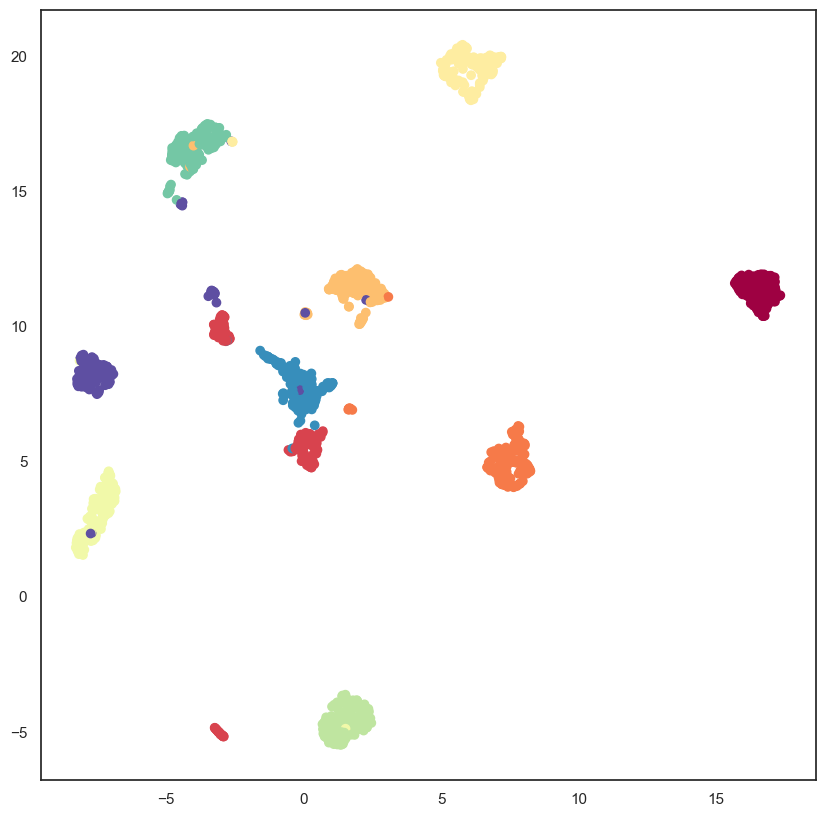

In [9]:
plt.scatter(plane_mapper.embedding_.T[0], plane_mapper.embedding_.T[1], c=digits.target, cmap='Spectral')

/Users/thijmennijdam/Documents/Github/multimedia/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/thijmennijdam/Documents/Github/multimedia/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


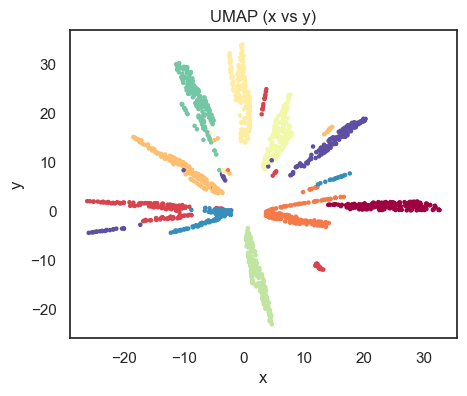

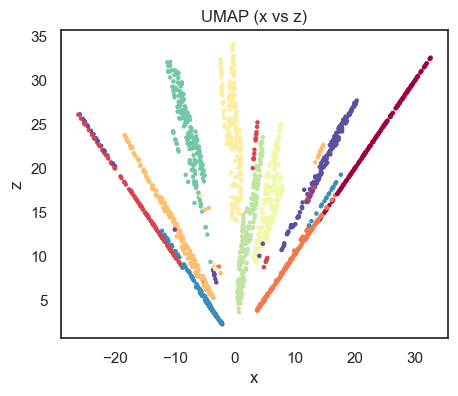

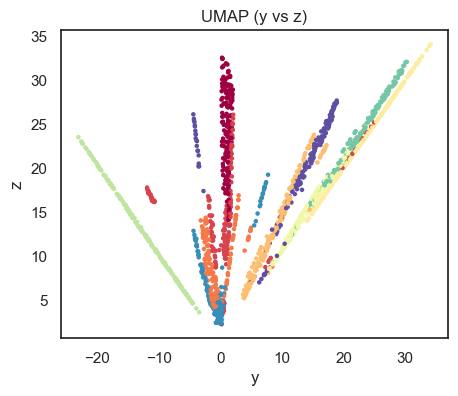

In [19]:
hyperbolic_mapper = umap.UMAP(output_metric='hyperboloid',
                              random_state=42, n_components=2).fit(digits.data)

x = hyperbolic_mapper.embedding_[:, 0]
y = hyperbolic_mapper.embedding_[:, 1]
z = np.sqrt(1 + np.sum(hyperbolic_mapper.embedding_**2, axis=1))

def plot_projection(data1, data2, title_suffix, label1, label2):
    plt.figure(figsize=(5, 4))
    plt.scatter(data1, data2, c=digits.target, cmap='Spectral', s=5)
    plt.xlabel(label1)
    plt.ylabel(label2)
    plt.title(f"UMAP ({title_suffix})")
    plt.show()

plot_projection(x, y, "x vs y", "x", "y")
plot_projection(x, z, "x vs z", "x", "z")
plot_projection(y, z, "y vs z", "y", "z")


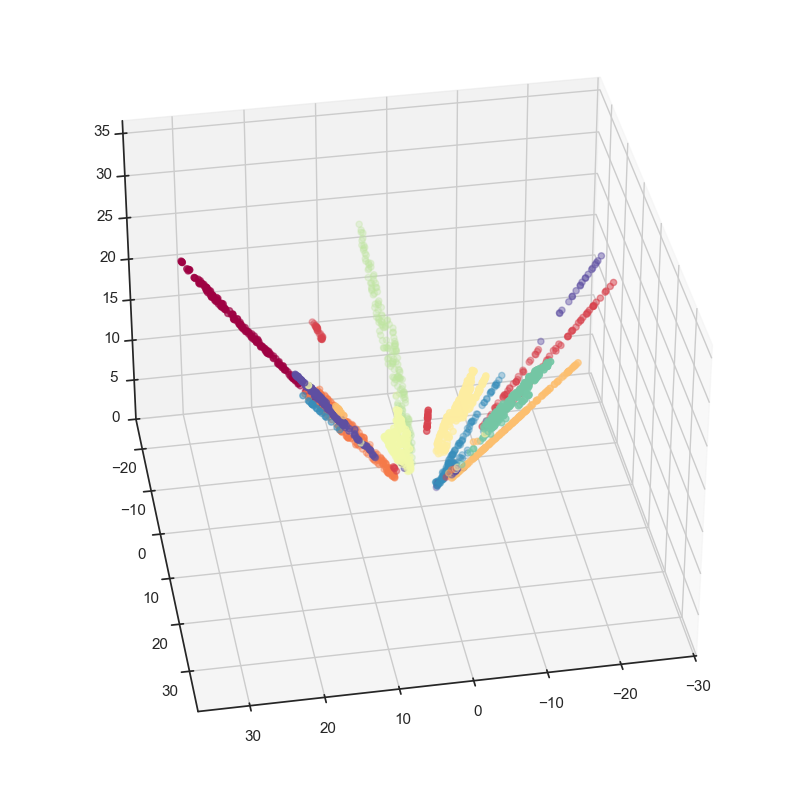

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=digits.target, cmap='Spectral')
ax.view_init(35, 80)

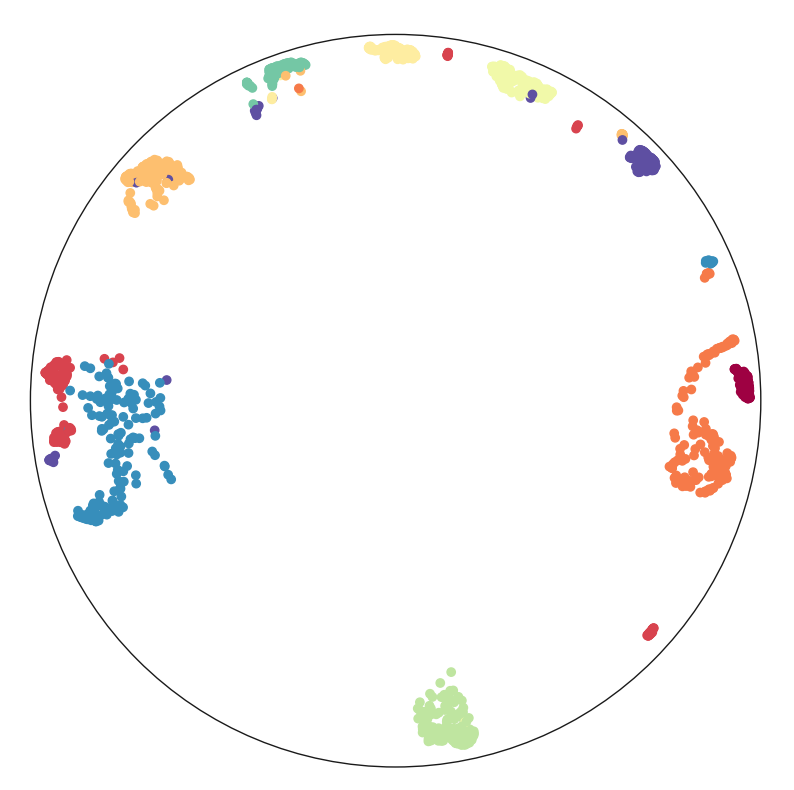

In [21]:
disk_x = x / (1 + z)
disk_y = y / (1 + z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(disk_x, disk_y, c=digits.target, cmap='Spectral')
boundary = plt.Circle((0,0), 1, fc='none', ec='k')
ax.add_artist(boundary)
ax.axis('off');
